In [39]:
#Load Packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing

In [2]:
#Read the data
train=pd.read_csv("loanpredtrain.csv")
test=pd.read_csv("loanpredtest.csv")

In [3]:
#Create copies of train and test datasets
train_original=train.copy()
test_original=test.copy()

In [4]:
#Understand the data
train.shape, test.shape

((614, 13), (367, 12))

In [5]:
train['Loan_Status'].value_counts(normalize=True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

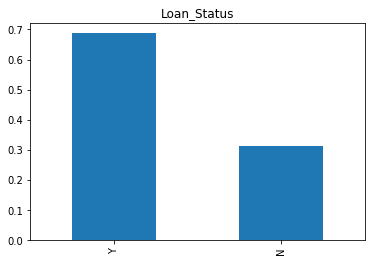

In [6]:
#Approx 69% of loan applications were approved, 31% not approved
#Visualize
train['Loan_Status'].value_counts(normalize=True).plot.bar(title='Loan_Status')

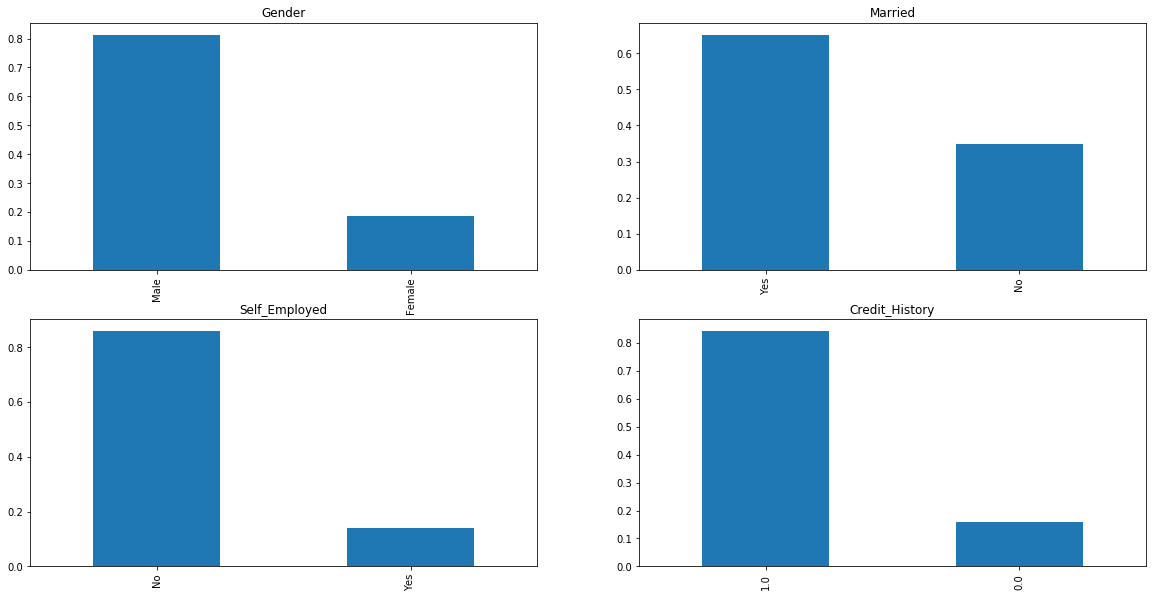

In [7]:
#Exploratory Data Analysis 
#Categorical Variables
plt.figure(1) 
plt.subplot(221) 
train['Gender'].value_counts(normalize=True).plot.bar(figsize=(20,10),title='Gender')
plt.subplot(222)
train['Married'].value_counts(normalize=True).plot.bar(title='Married')
plt.subplot(223)
train['Self_Employed'].value_counts(normalize=True).plot.bar(title='Self_Employed')
plt.subplot(224)
train['Credit_History'].value_counts(normalize=True).plot.bar(title='Credit_History')
plt.show()

In [8]:
#Approx 80% are male, 20% female
#Approx 65% married, 35% not married
#85% not self_employed, 15% self_employed
#85% have repaid their loans, 15% have not


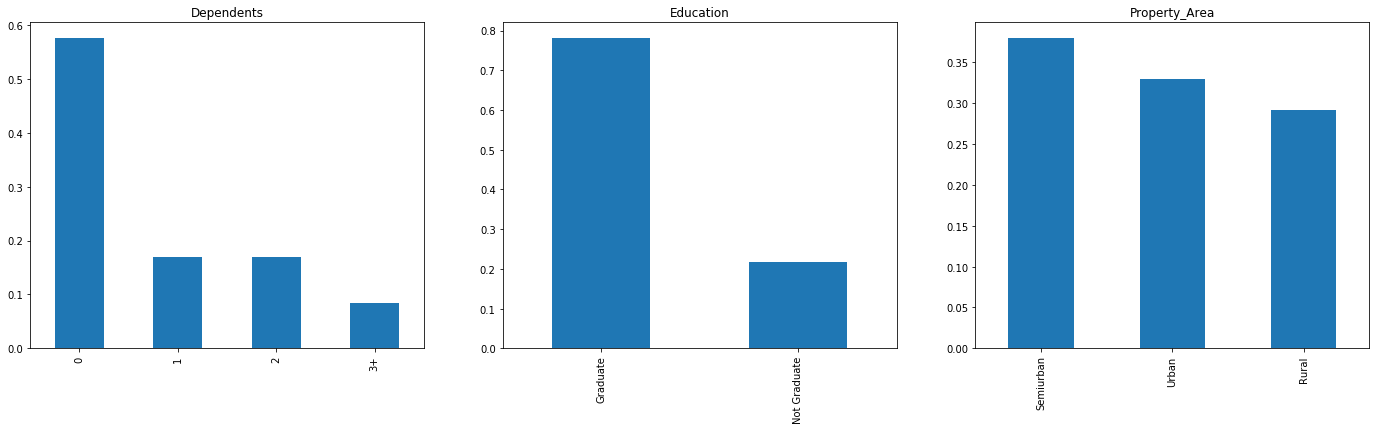

In [9]:
#Ordinal variables
plt.figure(1)
plt.subplot(131)
train['Dependents'].value_counts(normalize=True).plot.bar(figsize=(24,6), title='Dependents')
plt.subplot(132)
train['Education'].value_counts(normalize=True).plot.bar(title='Education')
plt.subplot(133)
train['Property_Area'].value_counts(normalize=True).plot.bar(title='Property_Area')
plt.show()

In [10]:
#Majority of applicants have 0 dependents
#Approx 80% are graduates, 20% not graduates
#Majority reside in semi-urban areas

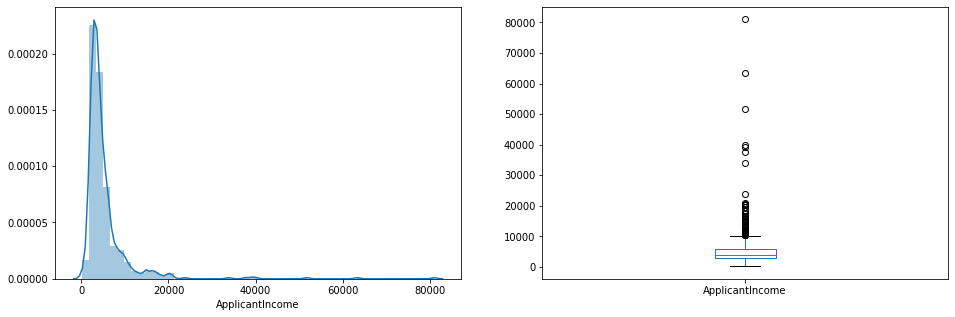

In [11]:
#Income
plt.figure(1)
plt.subplot(121) 
sns.distplot(train['ApplicantIncome']); 
plt.subplot(122)
train['ApplicantIncome'].plot.box(figsize=(16,5)) 
plt.show()

Text(0.5, 0.98, '')

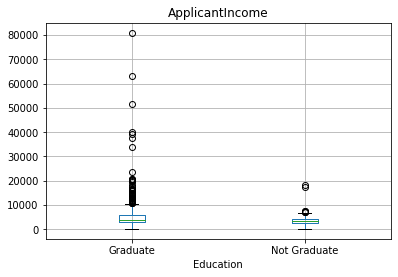

In [12]:
#Applicant income is positively skewed
#Boxplot indicates presence of outliers
#Verdict: we'll need to normalize ApplicantIncome
#Hypothesis: The outliers arise from income disparity in society
#Checking income disparity between graduates and non_graduates
train.boxplot(column='ApplicantIncome', by = 'Education') 
plt.suptitle("")



In [13]:
#Graduates earn significantly higher incomes

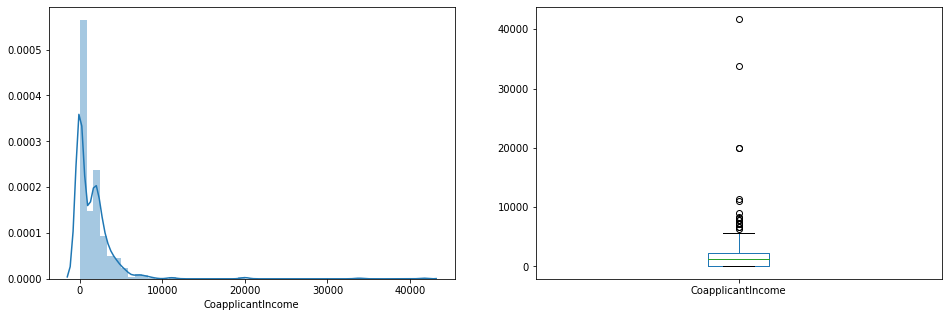

In [14]:
#CoapplicantIncome
plt.figure(1) 
plt.subplot(121) 
sns.distplot(train['CoapplicantIncome']); 
plt.subplot(122) 
train['CoapplicantIncome'].plot.box(figsize=(16,5)) 
plt.show()

In [15]:
#Coapplicant income is positively skewed
#Boxplot indicates presence of outliers
#We'll need to normalize CoapplicantIncome

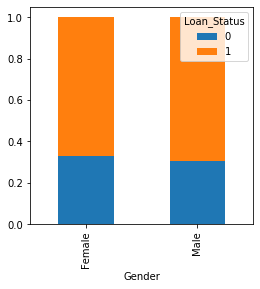

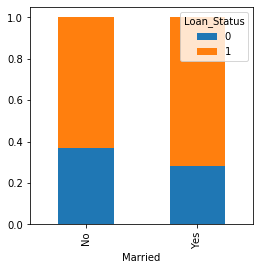

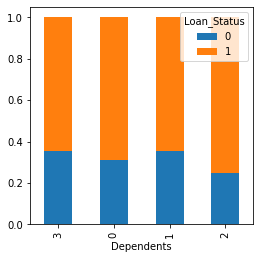

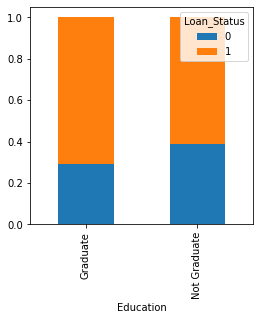

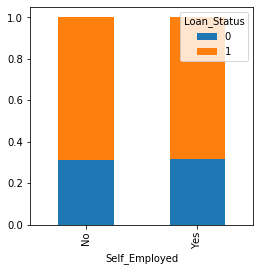

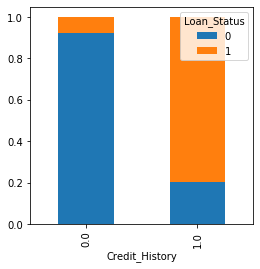

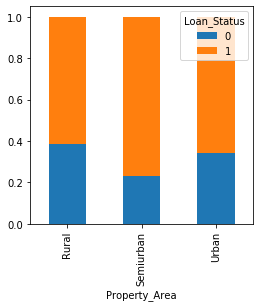

In [25]:
Gender=pd.crosstab(train['Gender'],train['Loan_Status'])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
Married=pd.crosstab(train['Married'],train['Loan_Status'])
Dependents=pd.crosstab(train['Dependents'],train['Loan_Status'])
Education=pd.crosstab(train['Education'],train['Loan_Status'])
Self_Employed=pd.crosstab(train['Self_Employed'],train['Loan_Status'])
Married.div(Married.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True, figsize=(4,4))
plt.show()
Dependents.div(Dependents.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True, figsize=(4,4))
plt.show()
Education.div(Education.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
Self_Employed.div(Self_Employed.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
Credit_History=pd.crosstab(train['Credit_History'],train['Loan_Status'])
Property_Area=pd.crosstab(train['Property_Area'],train['Loan_Status'])
Credit_History.div(Credit_History.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True, figsize=(4,4))
Property_Area.div(Property_Area.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True, figsize=(4,4))

In [16]:
train['LoanAmount'].describe()

count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64

In [17]:
#Need to impute missing values first

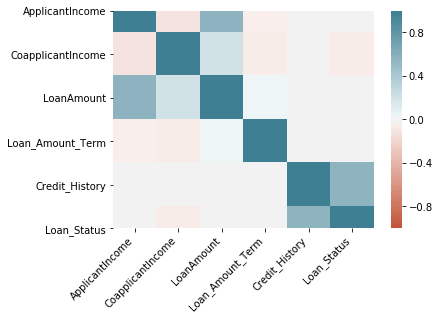

In [24]:
#Replace categorical values with integers
train['Dependents'].replace('3+', 3,inplace=True) 
test['Dependents'].replace('3+', 3,inplace=True) 
train['Loan_Status'].replace('N', 0,inplace=True) 
train['Loan_Status'].replace('Y', 1,inplace=True)
matrix = train.corr()
#Visualizing correlation between variables
ax = sns.heatmap(
    matrix, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [26]:
#Missing Values Imputation
#First check missing values in the training set
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [32]:
#EDA indicates that for categorical variables, some categories are more frequent, eg more males (80%) than females (20%)
#Missing categorical variables imputed using mode
train['Gender'].fillna(train['Gender'].mode()[0],inplace=True)
train['Married'].fillna(train['Married'].mode()[0],inplace=True)
train['Dependents'].fillna(train['Dependents'].mode()[0],inplace=True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0],inplace=True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0],inplace=True)
test['Gender'].fillna(test['Gender'].mode()[0], inplace=True) 
test['Dependents'].fillna(test['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0], inplace=True) 
test['Credit_History'].fillna(test['Credit_History'].mode()[0], inplace=True) 


In [28]:
#Checking descriptive statistics of train dataset to determine criteria for imputing missing numeric variables
train.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status
count,614.000000,614.000000,592.000000,600.00000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.855049,0.687296
std,6109.041673,2926.248369,85.587325,65.12041,0.352339,0.463973
min,150.000000,0.000000,9.000000,12.00000,0.000000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000,0.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000,1.000000


In [33]:
#No missing values: ApplicantIncome,CoapplicantIncome,Loan_Amount_Term,Credit_History,Loan_Status
#LoanAmount: 22 missing values outliers present based on EDA results above; imputation using median
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace=True)
test['LoanAmount'].fillna(test['LoanAmount'].median(), inplace=True)
#Loan_Amount_Term: Imputation using mode
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0], inplace=True) 


In [37]:
train=train.drop('Loan_ID',axis=1) 
test=test.drop('Loan_ID',axis=1)
X = train.drop('Loan_Status',1) 
y = train.Loan_Status

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...
609,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural
610,Male,Yes,3,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural
611,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban
612,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban


In [45]:
X['Gender'].replace("Male", '0',inplace=True) 
X['Gender'].replace("Female", '1',inplace=True)
X['Married'].replace("No", '0',inplace=True) 
X['Married'].replace("Yes", '1',inplace=True)
X['Education'].replace("Not Graduate", '0',inplace=True) 
X['Education'].replace("Graduate", '1',inplace=True)
X['Self_Employed'].replace("No", '0',inplace=True) 
X['Self_Employed'].replace("Yes", '1',inplace=True)
X['Property_Area'].replace("Urban", '0',inplace=True) 
X['Property_Area'].replace("Semiurban", '1',inplace=True)
X['Property_Area'].replace("Rural", '2',inplace=True) 


In [46]:
X

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0,0,0,1,0,5849,0.0,128.0,360.0,1.0,0
1,0,1,1,1,0,4583,1508.0,128.0,360.0,1.0,2
2,0,1,0,1,1,3000,0.0,66.0,360.0,1.0,0
3,0,1,0,0,0,2583,2358.0,120.0,360.0,1.0,0
4,0,0,0,1,0,6000,0.0,141.0,360.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...
609,1,0,0,1,0,2900,0.0,71.0,360.0,1.0,2
610,0,1,3,1,0,4106,0.0,40.0,180.0,1.0,2
611,0,1,1,1,0,8072,240.0,253.0,360.0,1.0,0
612,0,1,2,1,0,7583,0.0,187.0,360.0,1.0,0


In [50]:
X_scaled = preprocessing.scale(X)
X=X_scaled

In [48]:
test['Gender'].replace("Male", '0',inplace=True) 
test['Gender'].replace("Female", '1',inplace=True)
test['Married'].replace("No", '0',inplace=True) 
test['Married'].replace("Yes", '1',inplace=True)
test['Education'].replace("Not Graduate", '0',inplace=True) 
test['Education'].replace("Graduate", '1',inplace=True)
test['Self_Employed'].replace("No", '0',inplace=True) 
test['Self_Employed'].replace("Yes", '1',inplace=True)
test['Property_Area'].replace("Urban", '0',inplace=True) 
test['Property_Area'].replace("Semiurban", '1',inplace=True)
test['Property_Area'].replace("Rural", '2',inplace=True) 

In [51]:
test_scaled = preprocessing.scale(test)
test=test_scaled

In [52]:
class LogisticRegression:
    def __init__(self, lr=0.01, num_iter=100000, fit_intercept=True, verbose=False):
        self.lr = lr
        self.num_iter = num_iter
        self.fit_intercept = fit_intercept
        self.verbose = verbose
    
    def __add_intercept(self, X):
        intercept = np.ones((X.shape[0], 1))
        return np.concatenate((intercept, X), axis=1)
    
    def __sigmoid(self, z):
        return 1 / (1 + np.exp(-z))
    def __loss(self, h, y):
        return (-y * np.log(h) - (1 - y) * np.log(1 - h)).mean()
    
    def fit(self, X, y):
        if self.fit_intercept:
            X = self.__add_intercept(X)
        
        # weights initialization
        self.theta = np.zeros(X.shape[1])
        
        for i in range(self.num_iter):
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            gradient = np.dot(X.T, (h - y)) / y.size
            self.theta -= self.lr * gradient
            
            z = np.dot(X, self.theta)
            h = self.__sigmoid(z)
            loss = self.__loss(h, y)
                
            if(self.verbose ==True and i % 10000 == 0):
                print(f'loss: {loss} \t')
    
    def predict_prob(self, X):
        if self.fit_intercept:
            X = self.__add_intercept(X)
    
        return self.__sigmoid(np.dot(X, self.theta))
    
    def predict(self, X):
        return self.predict_prob(X).round()

In [53]:
model = LogisticRegression(lr=0.1, num_iter=300000)

In [54]:
%time model.fit(X, y)

Wall time: 9min 23s


In [55]:
preds = model.predict(test)

In [57]:
submission=pd.read_csv("Sample_Submission_49d68Cx.csv")
submission['Loan_Status']=preds
submission['Loan_ID']=test_original['Loan_ID']

In [58]:
submission['Loan_Status'].replace(0, 'N',inplace=True) 
submission['Loan_Status'].replace(1, 'Y',inplace=True)
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('mysubmission.csv')

In [60]:
#Accuracy of 77.78%